# Dimentionality Reduction Using Databricks On Wine Dataset

## Loading the Dataset

In [0]:
from sklearn.datasets import load_wine

# Load the Wine dataset
wine_data = load_wine()
wine_data

Out[1]: {'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [0]:
# Extract features and target labels
X = wine_data.data
y = wine_data.target

## Preprocessing the Dataset

In [0]:
import pandas as pd

# Convert to a DataFrame for easier handling
df = pd.DataFrame(X, columns=wine_data.feature_names)

# Check for missing values
missing_values = df.isnull().sum()
missing_values

Out[3]: alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [0]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the dataset
X_scaled = scaler.fit_transform(X)
X_scaled


Out[7]: array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## Visualizing the Dataset

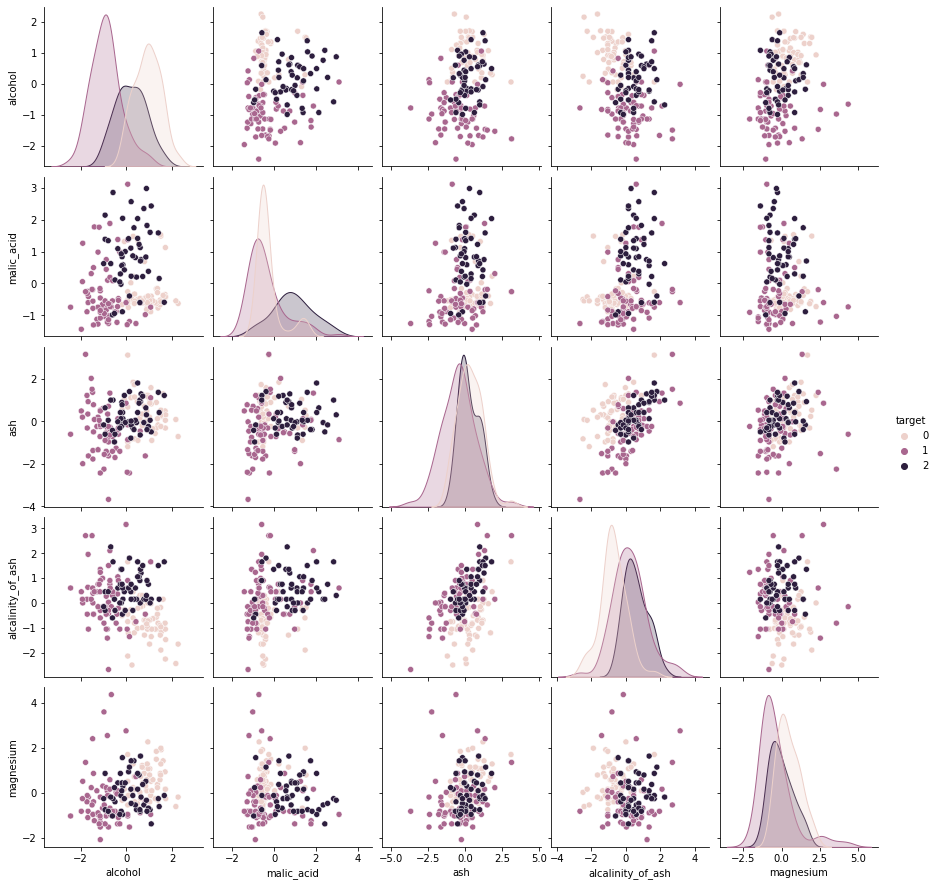

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert scaled data back to a DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=wine_data.feature_names)

# Add the target column to the DataFrame
df_scaled['target'] = y

# Select a few columns to plot
columns_to_plot = df_scaled.columns[0:5].tolist() + ['target']

# Create a pair plot
sns.pairplot(df_scaled[columns_to_plot], hue='target')

# Show the plot
plt.show()


## Applying PCA (Principal Component Analysis)

In [0]:
from sklearn.decomposition import PCA

# Define the PCA transformer
# We'll reduce the dataset to 2 dimensions for easy visualization
pca = PCA(n_components=2)

# Fit and transform the scaled data
X_pca = pca.fit_transform(X_scaled)


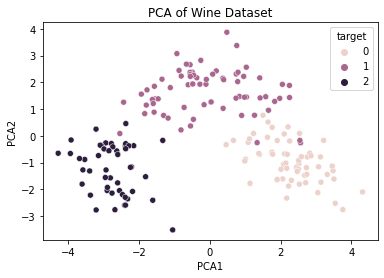

In [0]:
# Create a DataFrame with PCA results
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['target'] = y

# Plotting the PCA results
sns.scatterplot(x='PCA1', y='PCA2', hue='target', data=df_pca)
plt.title('PCA of Wine Dataset')
plt.show()


## Applying t-SNE

In [0]:
from sklearn.manifold import TSNE

# Define the t-SNE transformer
tsne = TSNE(n_components=2, random_state=0)

# Fit and transform the scaled data
X_tsne = tsne.fit_transform(X_scaled)


/databricks/python/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/databricks/python/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


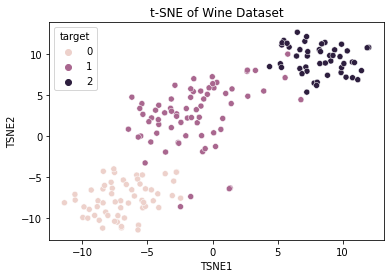

In [0]:
# Create a DataFrame with t-SNE results
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
df_tsne['target'] = y

# Plotting the t-SNE results
sns.scatterplot(x='TSNE1', y='TSNE2', hue='target', data=df_tsne)
plt.title('t-SNE of Wine Dataset')
plt.show()
